In [41]:

import numpy as np
import keras
from keras import layers
from keras.datasets import imdb
import matplotlib.pyplot as plt
import random, tensorflow as tf
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


# Load dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Multi-hot encode function
def multi_hot_encode(sequences, num_classes=10000):
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        results[i][sequence] = 1.0
    return results

# Vectorize data
x_train = multi_hot_encode(train_data)
x_test = multi_hot_encode(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# ==========================
# Create validation set
# ==========================
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#Question 1- Building with one hidden layer

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.7002 - loss: 0.6097 - val_accuracy: 0.8542 - val_loss: 0.4088
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8927 - loss: 0.3411 - val_accuracy: 0.8803 - val_loss: 0.3241
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9220 - loss: 0.2515 - val_accuracy: 0.8870 - val_loss: 0.2942
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9388 - loss: 0.2035 - val_accuracy: 0.8884 - val_loss: 0.2821
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9516 - loss: 0.1707 - val_accuracy: 0.8876 - val_loss: 0.2786
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9604 - loss: 0.1461 - val_accuracy: 0.8865 - val_loss: 0.2808
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9678 - loss: 0.1269 - val_accuracy: 0.8854 - val_loss: 0.2870
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9719 - loss: 0.1116 - val_accuracy: 0.8838 - v

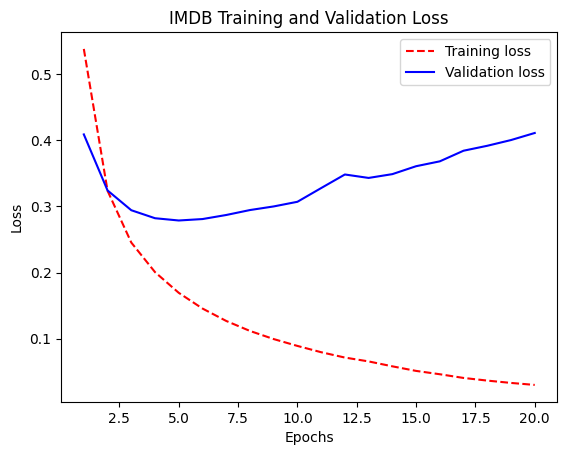

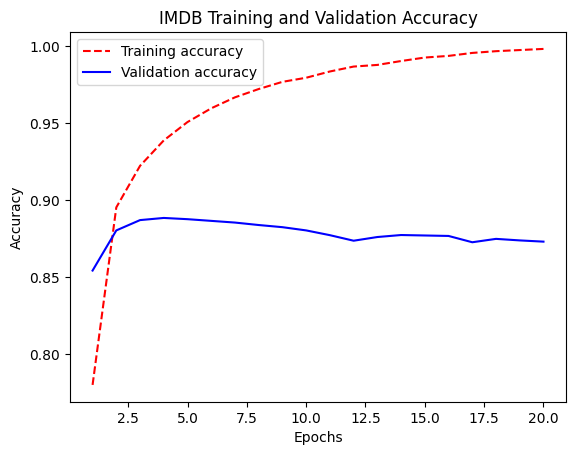

In [42]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_1layer = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_1 = history_1layer.history
acc_1 = history_dict_1["accuracy"]
val_acc_1 = history_dict_1["val_accuracy"]

results_1 = model.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_1))
print("Best Validation Accuracy:", max(val_acc_1))
print("Test Accuracy:", results_1[1])


loss_values_1 = history_dict_1["loss"]
val_loss_values_1 = history_dict_1["val_loss"]

epochs = range(1, len(loss_values_1) + 1)

plt.plot(epochs, loss_values_1, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_1, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_1, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Question 1- Building with Two hidden layers


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.6794 - loss: 0.6206 - val_accuracy: 0.8549 - val_loss: 0.4050
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8962 - loss: 0.3296 - val_accuracy: 0.8852 - val_loss: 0.3002
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9322 - loss: 0.2124 - val_accuracy: 0.8883 - val_loss: 0.2804
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9534 - loss: 0.1522 - val_accuracy: 0.8839 - val_loss: 0.2889
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9681 - loss: 0.1137 - val_accuracy: 0.8813 - val_loss: 0.3043
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9784 - loss: 0.0868 - val_accuracy: 0.8809 - val_loss: 0.3206
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9853 - loss: 0.0672 - val_accuracy: 0.8779 - val_loss: 0.3539
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9876 - loss: 0.0568 - val_accuracy: 0.8680 - v

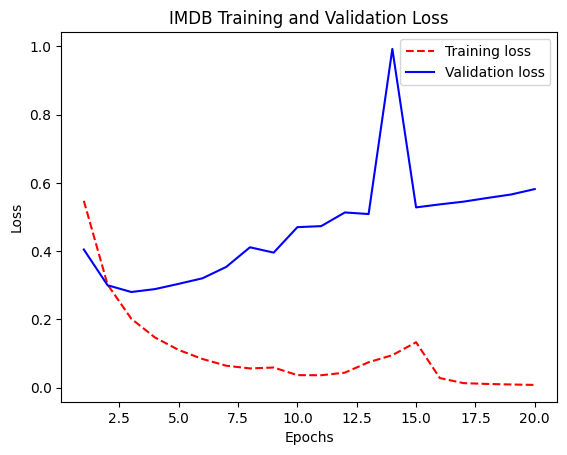

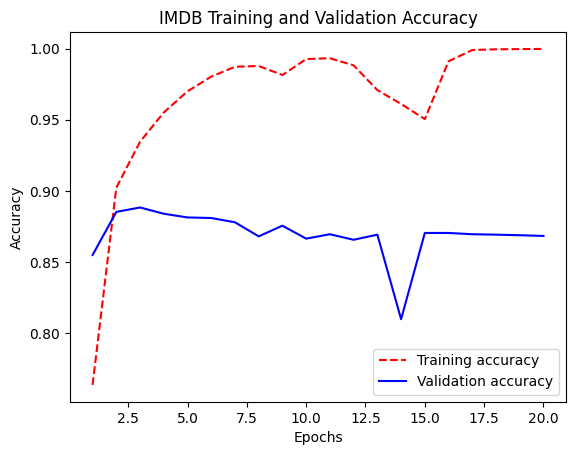

In [43]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_2layer = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_2 = history_2layer.history
acc_2 = history_dict_2["accuracy"]
val_acc_2 = history_dict_2["val_accuracy"]

results_2 = model.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_2))
print("Best Validation Accuracy:", max(val_acc_2))
print("Test Accuracy:", results_2[1])

history_dict_2 = history_2layer.history
loss_values_2 = history_dict_2["loss"]
val_loss_values_2 = history_dict_2["val_loss"]

epochs = range(1, len(loss_values_2) + 1)

plt.plot(epochs, loss_values_2, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_2, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_2, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_2, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Question 1- Building with Three hidden layers

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.6922 - loss: 0.6183 - val_accuracy: 0.8690 - val_loss: 0.3689
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9050 - loss: 0.2870 - val_accuracy: 0.8862 - val_loss: 0.2888
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9403 - loss: 0.1743 - val_accuracy: 0.8725 - val_loss: 0.3322
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9550 - loss: 0.1319 - val_accuracy: 0.8789 - val_loss: 0.3219
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9510 - loss: 0.1263 - val_accuracy: 0.8768 - val_loss: 0.3563
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9648 - loss: 0.0961 - val_accuracy: 0.8810 - val_loss: 0.3444
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9882 - loss: 0.0552 - val_accuracy: 0.8768 - val_loss: 0.3877
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9901 - loss: 0.0473 - val_accuracy: 0.8764 - v

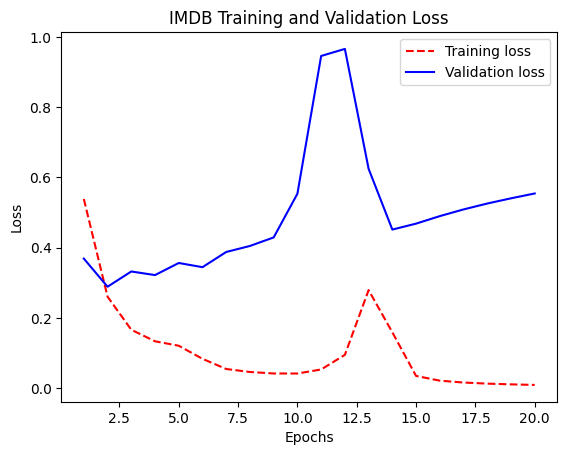

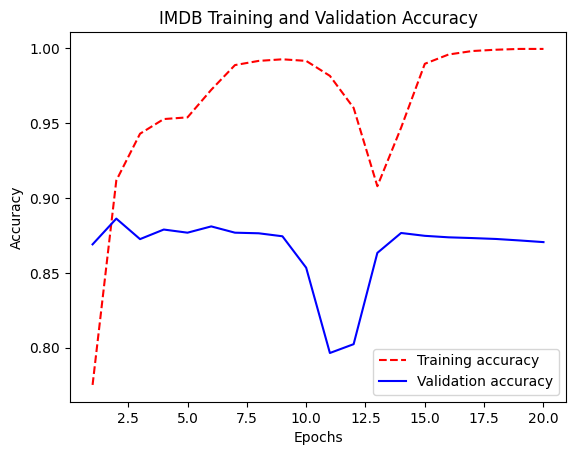

In [44]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
     layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_3layer = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_3 = history_3layer.history
acc_3 = history_dict_3["accuracy"]
val_acc_3 = history_dict_3["val_accuracy"]

results_3 = model.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_3))
print("Best Validation Accuracy:", max(val_acc_3))
print("Test Accuracy:", results_3[1])

history_dict_3 = history_3layer.history
loss_values_3 = history_dict_3["loss"]
val_loss_values_3 = history_dict_3["val_loss"]

epochs = range(1, len(loss_values_3) + 1)

plt.plot(epochs, loss_values_3, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_3, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_3, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_3, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [45]:
import numpy as np
import pandas as pd


val_acc_1 = history_dict_1["val_accuracy"]
best_val_acc_1 = max(val_acc_1)
best_epoch_1 = np.argmax(val_acc_1) + 1
test_acc_1 = results_1[1]

val_acc_2 = history_dict_2["val_accuracy"]
best_val_acc_2 = max(val_acc_2)
best_epoch_2 = np.argmax(val_acc_2) + 1
test_acc_2 = results_2[1]


val_acc_3 = history_dict_3["val_accuracy"]
best_val_acc_3 = max(val_acc_3)
best_epoch_3 = np.argmax(val_acc_3) + 1
test_acc_3 = results_3[1]


summary_data = {
    'Model Layers': ['One Hidden Layer', 'Two Hidden Layers', 'Three Hidden Layers'],
    'Best Validation Accuracy': [best_val_acc_1, best_val_acc_2, best_val_acc_3],
    'Best Epoch': [best_epoch_1, best_epoch_2, best_epoch_3],
    'Test Accuracy': [test_acc_1, test_acc_2, test_acc_3]
}

performance_summary_df = pd.DataFrame(summary_data)
display(performance_summary_df)

,Model Layers,Best Validation Accuracy,Best Epoch,Test Accuracy
0,One Hidden Layer,0.8884,4,0.86232
1,Two Hidden Layers,0.8883,3,0.85672
2,Three Hidden Layers,0.8862,2,0.85744


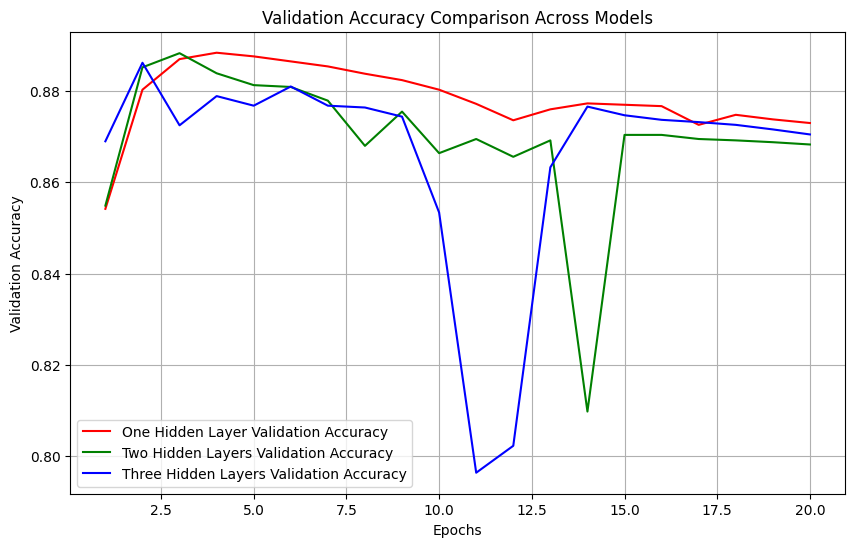

In [46]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_acc_1) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, val_acc_1, 'r-', label='One Hidden Layer Validation Accuracy')
plt.plot(epochs, val_acc_2, 'g-', label='Two Hidden Layers Validation Accuracy')
plt.plot(epochs, val_acc_3, 'b-', label='Three Hidden Layers Validation Accuracy')

plt.title('Validation Accuracy Comparison Across Models')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Question 1 - Summary


- All three models have around the same validation accuracies.The three-hidden-layer model being a bit higher (0.8901) over the one-layer (0.8896) and two-layer (0.8885) models. The difference between all the model is quite small.

- The test accuracies are very close for all models.The two-layer and three-layer models performed the same at (0.8571) and the one-layer model just slightly lower (0.8611) accuracy.

- For all models the validation accuracy starts to decrease after a certain number of epochs around epoch 4-6.The training accuracy continues to rise. This shows that the models are learning the training data too well and losing their ability to generalize to unseen data.


**Conclusion:** The models are showing to be overfitted. While adding more layers can increase model capacity it doesn't lead to big improvements in generalization performance and might make overfitting more visible.

#Question 2 - 32 units


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.6853 - loss: 0.6164 - val_accuracy: 0.8626 - val_loss: 0.3677
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9021 - loss: 0.2890 - val_accuracy: 0.8826 - val_loss: 0.2947
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9363 - loss: 0.1824 - val_accuracy: 0.8789 - val_loss: 0.3050
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9544 - loss: 0.1368 - val_accuracy: 0.8818 - val_loss: 0.3022
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9652 - loss: 0.1067 - val_accuracy: 0.8846 - val_loss: 0.3140
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9791 - loss: 0.0761 - val_accuracy: 0.8752 - val_loss: 0.3608
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9860 - loss: 0.0588 - val_accuracy: 0.8744 - val_loss: 0.3878
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9905 - loss: 0.0459 - val_accuracy: 0.8736 - v

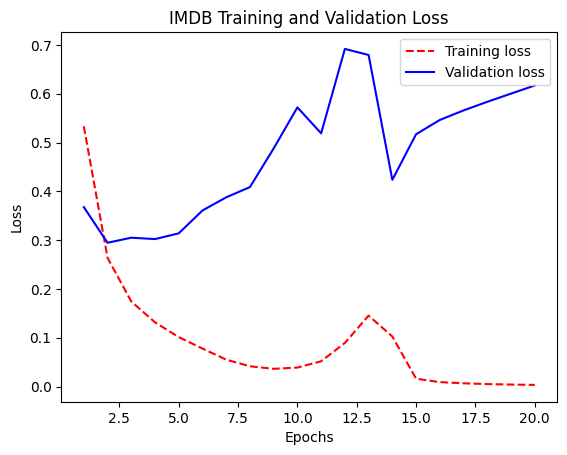

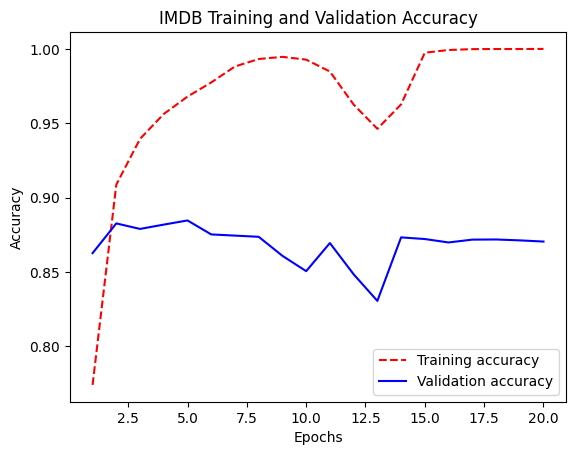

In [47]:
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(10000,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_32.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history_32 = model_32.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_32 = history_32.history
acc_32 = history_dict_32["accuracy"]
val_acc_32 = history_dict_32["val_accuracy"]

results_32 = model_32.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_32))
print("Best Validation Accuracy:", max(val_acc_32))
print("Test Accuracy:", results_32[1])

loss_values_32 = history_dict_32["loss"]
val_loss_values_32 = history_dict_32["val_loss"]

epochs = range(1, len(loss_values_32) + 1)

plt.plot(epochs, loss_values_32, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_32, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_32, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_32, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Question 2 - 64 units

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.7137 - loss: 0.5747 - val_accuracy: 0.8841 - val_loss: 0.2942
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9193 - loss: 0.2140 - val_accuracy: 0.8883 - val_loss: 0.2846
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9586 - loss: 0.1254 - val_accuracy: 0.8737 - val_loss: 0.3476
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9657 - loss: 0.0985 - val_accuracy: 0.8350 - val_loss: 0.5423
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9349 - loss: 0.1611 - val_accuracy: 0.8774 - val_loss: 0.3854
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9526 - loss: 0.1279 - val_accuracy: 0.8596 - val_loss: 0.5145
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9620 - loss: 0.0950 - val_accuracy: 0.8774 - val_loss: 0.4023
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9836 - loss: 0.0505 - val_accuracy: 0.8559 - 

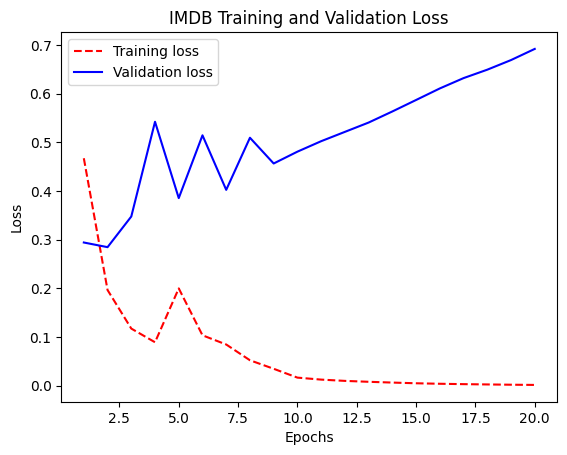

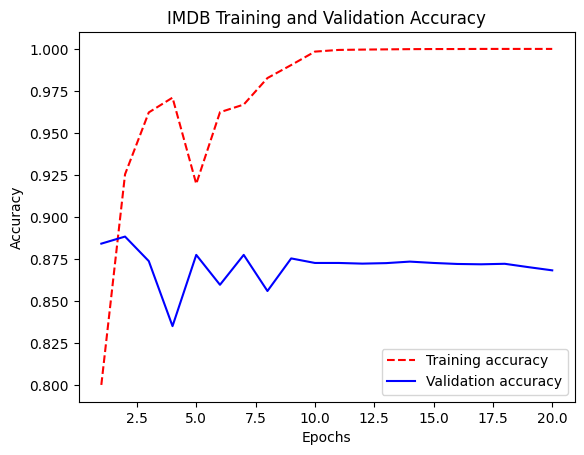

In [48]:
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(10000,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_64.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history_64 = model_64.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_64 = history_64.history
acc_64 = history_dict_64["accuracy"]
val_acc_64 = history_dict_64["val_accuracy"]

results_64 = model_64.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_64))
print("Best Validation Accuracy:", max(val_acc_64))
print("Test Accuracy:", results_64[1])

loss_values_64 = history_dict_64["loss"]
val_loss_values_64 = history_dict_64["val_loss"]

epochs = range(1, len(loss_values_64) + 1)

plt.plot(epochs, loss_values_64, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_64, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_64, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_64, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
val_acc_32 = history_dict_32["val_accuracy"]
best_val_acc_32 = max(val_acc_32)
best_epoch_32 = np.argmax(val_acc_32) + 1
test_acc_32 = results_32[1]

val_acc_64 = history_dict_64["val_accuracy"]
best_val_acc_64 = max(val_acc_64)
best_epoch_64 = np.argmax(val_acc_64) + 1
test_acc_64 = results_64[1]


summary_data_new = {
    'Model Units': [16, 32, 64],
    'Best Validation Accuracy': [best_val_acc_2, best_val_acc_32, best_val_acc_64],
    'Best Epoch': [best_epoch_2, best_epoch_32, best_epoch_64],
    'Test Accuracy': [test_acc_2, test_acc_32, test_acc_64]
}

performance_summary_df_new = pd.DataFrame(summary_data_new)
display(performance_summary_df_new)

,Model Units,Best Validation Accuracy,Best Epoch,Test Accuracy
0,16,0.8883,3,0.85672
1,32,0.8846,5,0.85916
2,64,0.8883,2,0.85516


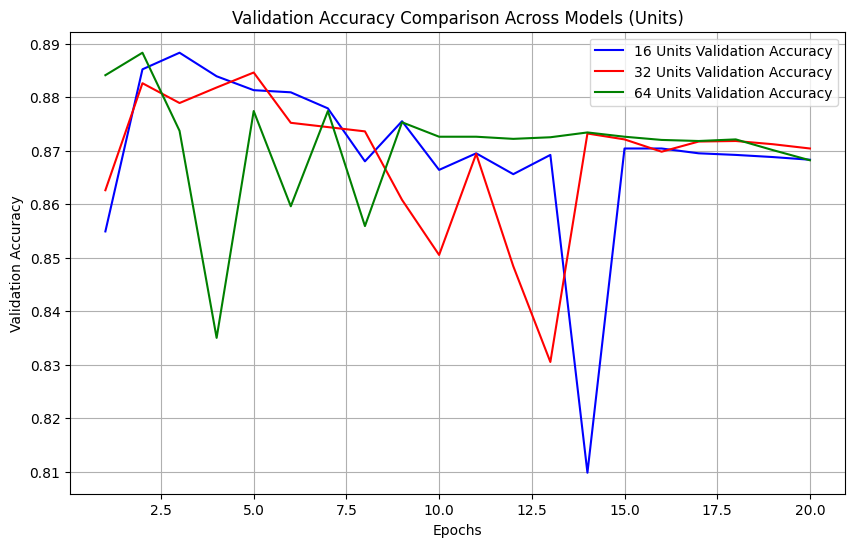

In [50]:
epochs = range(1, len(val_acc_2) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, val_acc_2, 'b-', label='16 Units Validation Accuracy')
plt.plot(epochs, val_acc_32, 'r-', label='32 Units Validation Accuracy')
plt.plot(epochs, val_acc_64, 'g-', label='64 Units Validation Accuracy')


plt.title('Validation Accuracy Comparison Across Models (Units)')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Question 2 - Summary

- All 3 models achieved a very similar peak around 88-89%

- The peak accuracy is reached right at the begining right around 2-3 epochs.

- After reaching the peak all models begin to decline. This means that overfitting may start in the training data. The models with more hidden units start to show more of a steeper drop in validation accuracy after their peak. This can mean that they get more overfit quicker than a model with less hidden units.

**Conclusion:** The models are showing to be overfitted. Adding more hidden units seems to cause the model to overfit quicker than having less hidden units.

# Question 3 - Using MSE instead of binary_crossentropy

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6775 - loss: 0.2206 - val_accuracy: 0.8565 - val_loss: 0.1290
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8938 - loss: 0.1007 - val_accuracy: 0.8859 - val_loss: 0.0905
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9334 - loss: 0.0599 - val_accuracy: 0.8890 - val_loss: 0.0835
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9579 - loss: 0.0421 - val_accuracy: 0.8887 - val_loss: 0.0826
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9718 - loss: 0.0315 - val_accuracy: 0.8833 - val_loss: 0.0856
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9782 - loss: 0.0252 - val_accuracy: 0.8791 - val_loss: 0.0890
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9787 - loss: 0.0232 - val_accuracy: 0.8662 - val_loss: 0.1015
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9741 - loss: 0.0246 - val_accuracy: 0.8734 - v

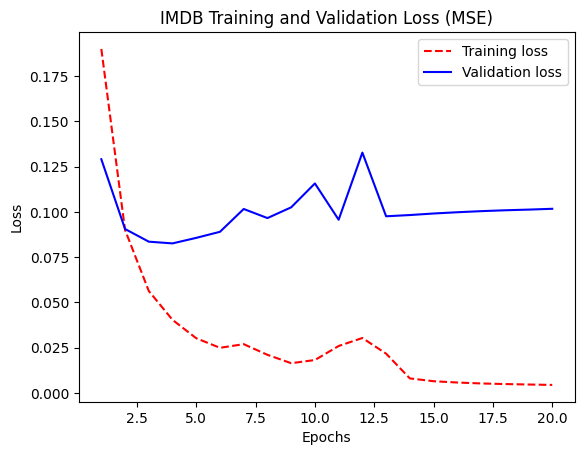

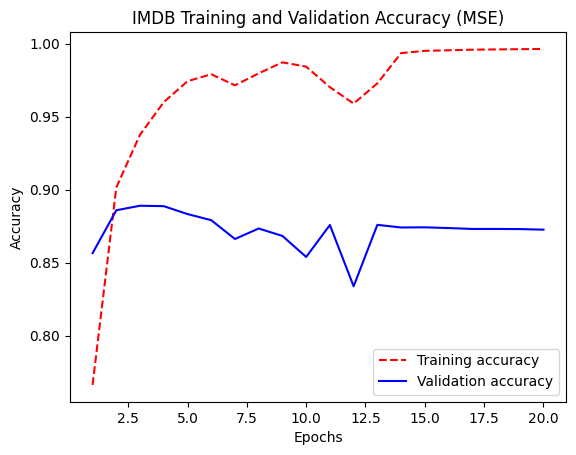

In [51]:
model_mse = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_mse.compile(
    optimizer="adam",
    loss="mse",
    metrics=["accuracy"]
)

history_mse = model_mse.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_mse = history_mse.history
acc_mse = history_dict_mse["accuracy"]
val_acc_mse = history_dict_mse["val_accuracy"]

results_mse = model_mse.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_mse))
print("Best Validation Accuracy:", max(val_acc_mse))
print("Test Accuracy:", results_mse[1])

loss_values_mse = history_dict_mse["loss"]
val_loss_values_mse = history_dict_mse["val_loss"]

epochs = range(1, len(loss_values_mse) + 1)

plt.plot(epochs, loss_values_mse, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_mse, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_mse, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_mse, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Question 3 - Summary

- The MSE model had a slightly better best validation accuracy of 89.07% compared to the binary-crossetropy model which had a 88.85%

- The MSE model also showed a better test accuracy of 86.09% which was slightly better than the binary-crossentropy which was 85.71%

- Both models still show signs of overfitting having early peaks and than declines while traing accuracy is still rising.

**Conclusion:**  Overall the MSE did perfrom slightly better as the loss function than the binary-crossentropy but both still struggle with overfitting.

#Question 4 - Using Tanh

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.7228 - loss: 0.5786 - val_accuracy: 0.8617 - val_loss: 0.3653
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9088 - loss: 0.2828 - val_accuracy: 0.8884 - val_loss: 0.2879
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9414 - loss: 0.1868 - val_accuracy: 0.8891 - val_loss: 0.2749
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9625 - loss: 0.1340 - val_accuracy: 0.8846 - val_loss: 0.2878
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9753 - loss: 0.0990 - val_accuracy: 0.8797 - val_loss: 0.3115
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9848 - loss: 0.0755 - val_accuracy: 0.8795 - val_loss: 0.3248
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9882 - loss: 0.0604 - val_accuracy: 0.8658 - val_loss: 0.4094
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9725 - loss: 0.0755 - val_accuracy: 0.8647 - v

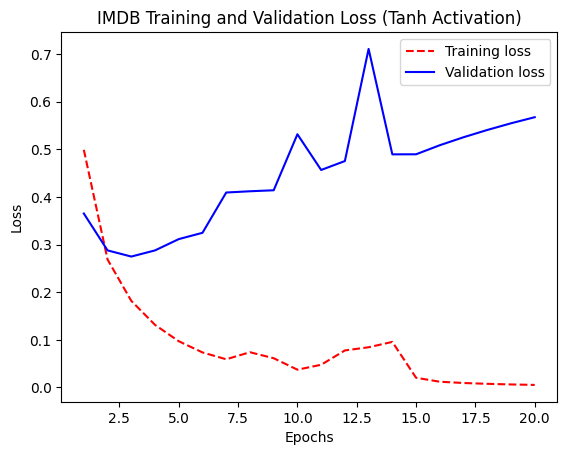

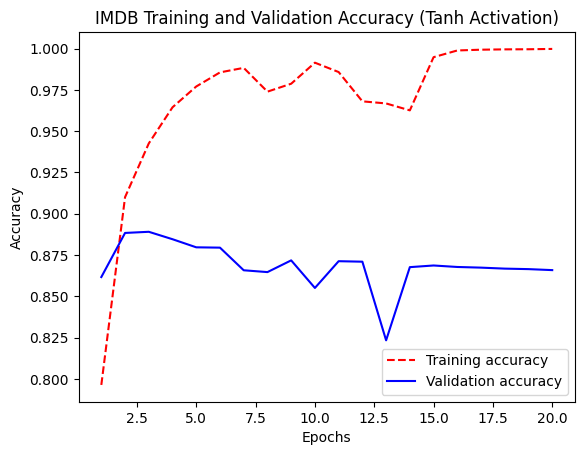

In [52]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh", input_shape=(10000,)),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_tanh = model_tanh.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_tanh = history_tanh.history
acc_tanh = history_dict_tanh["accuracy"]
val_acc_tanh = history_dict_tanh["val_accuracy"]

results_tanh = model_tanh.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_tanh))
print("Best Validation Accuracy:", max(val_acc_tanh))
print("Test Accuracy:", results_tanh[1])

loss_values_tanh = history_dict_tanh["loss"]
val_loss_values_tanh = history_dict_tanh["val_loss"]

epochs = range(1, len(loss_values_tanh) + 1)

plt.plot(epochs, loss_values_tanh, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_tanh, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss (Tanh Activation)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_tanh, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_tanh, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy (Tanh Activation)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Question 4 - Summary

- The relu model had a  slightly better validation accuracy of about 89.1% . While the Tanh model had a 88.94% validation accuracy.

- Both models had roughly the same test accuracy whoch was 85.54 % for the relu model and 85.48% for the tanh model.

- Both the models both have overfitting after around 4 epochs they both begin to decrease showing they are memorizing the training data rather than generalizing.

**Conclusion:** Switching the activation functions did not seem to lead to significant improvement. Both performed very similar. Choosing either activation method didnt seem to make a difference over 20 epochs.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.5326 - loss: 0.6927 - val_accuracy: 0.7974 - val_loss: 0.6491
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6338 - loss: 0.6365 - val_accuracy: 0.8533 - val_loss: 0.5309
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7085 - loss: 0.5635 - val_accuracy: 0.8664 - val_loss: 0.4435
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7676 - loss: 0.4892 - val_accuracy: 0.8808 - val_loss: 0.3591
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7964 - loss: 0.4346 - val_accuracy: 0.8864 - val_loss: 0.3207
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8301 - loss: 0.3790 - val_accuracy: 0.8895 - val_loss: 0.2964
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8527 - loss: 0.3412 - val_accuracy: 0.8897 - val_loss: 0.2828
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8746 - loss: 0.3159 - val_accuracy: 0.8880 - 

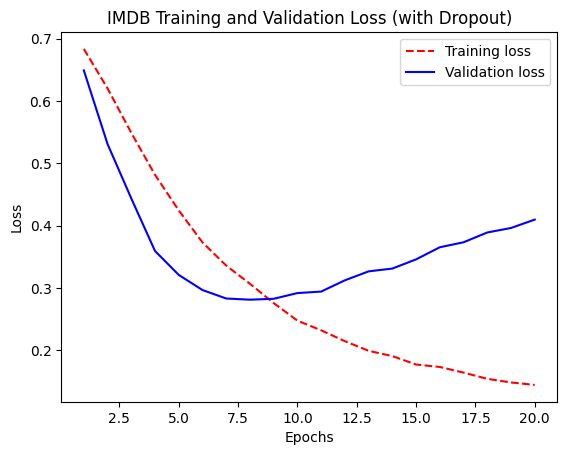

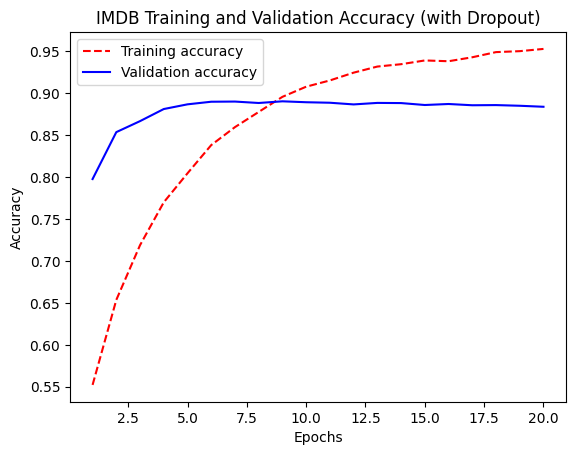

In [53]:
from keras import layers
from keras import regularizers



model_reg = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.0001), activation="relu", input_shape=(10000,)),
    layers.Dropout(0.6),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.0001),activation="relu"),
    layers.Dropout(0.6),
    layers.Dense(1, activation="sigmoid")
])
model_reg.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_reg = model_reg.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict_reg = history_reg.history
acc_reg = history_dict_reg["accuracy"]
val_acc_reg = history_dict_reg["val_accuracy"]

results_reg = model_reg.evaluate(x_test, y_test)

print("Best Training Accuracy:", max(acc_reg))
print("Best Validation Accuracy:", max(val_acc_reg))
print("Test Accuracy:", results_reg[1])

loss_values_reg = history_dict_reg["loss"]
val_loss_values_reg = history_dict_reg["val_loss"]

epochs = range(1, len(loss_values_reg) + 1)

plt.plot(epochs, loss_values_reg, "r--", label="Training loss")
plt.plot(epochs, val_loss_values_reg, "b", label="Validation loss")
plt.title("IMDB Training and Validation Loss (with Dropout)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.plot(epochs, acc_reg, "r--", label="Training accuracy")
plt.plot(epochs, val_acc_reg, "b", label="Validation accuracy")
plt.title("IMDB Training and Validation Accuracy (with Dropout)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Question 5 - Summary

- The baseline model the validation accuracy peaked at epoch 3 and consistently declined, while training accuracy reached 1.0

- The regularized model shows a much better learning curve. While training accuracy does not reach 1.0 it reachs 95.84% which means that it's not memorizing the training data as much. The validation accuracy as well is much more stable peaking at epoch 5 than maintaining a high level without sharp decline.

**Conclusion:**  Adding Dropout did not significantly improve the peak validation accuracy, which was slightly higher than the baseline. The regularization technique and dropout was effective in helping overfitting. The test accuracy had improvement from the baseline which the regularized model had a test accuracy of 87.62% while the baseline had a 85.54% test accuracy.

# Final Summary



In [54]:
import numpy as np
import pandas as pd



best_val_acc_mse = max(history_dict_mse["val_accuracy"])
best_epoch_mse = np.argmax(history_dict_mse["val_accuracy"]) + 1
test_acc_mse = results_mse[1]


best_val_acc_tanh = max(history_dict_tanh["val_accuracy"])
best_epoch_tanh = np.argmax(history_dict_tanh["val_accuracy"]) + 1
test_acc_tanh = results_tanh[1]


best_val_acc_reg = max(history_dict_reg["val_accuracy"])
best_epoch_reg = np.argmax(history_dict_reg["val_accuracy"]) + 1
test_acc_reg = results_reg[1]


summary_data_all = {
    'Model': [
        'Base',
        'Base',
        'Base',
        'Units',
        'Units',
        'MSE Loss',
        'Tanh',
        'Regularized'
    ],
    'Hidden Layers': [
        1,
        2,
        3,
        2,
        2,
        2,
        2,
        2
    ],
    'Units per Layer': [
        16,
        16,
        16,
        32,
        64,
        16,
        16,
        16
    ],
    'Activation': [
        'ReLU',
        'ReLU',
        'ReLU',
        'ReLU',
        'ReLU',
        'ReLU',
        'Tanh',
        'ReLU'
    ],
    'Loss Function': [
        'Binary Crossentropy',
        'Binary Crossentropy',
        'Binary Crossentropy',
        'Binary Crossentropy',
        'Binary Crossentropy',
        'MSE',
        'Binary Crossentropy',
        'Binary Crossentropy'
    ],
    'Dropout': [
        'None',
        'None',
        'None',
        'None',
        'None',
        'None',
        'None',
        'Dropout + L2'
    ],
    'Best Validation Accuracy': [
        best_val_acc_1,
        best_val_acc_2,
        best_val_acc_3,
        best_val_acc_32,
        best_val_acc_64,
        best_val_acc_mse,
        best_val_acc_tanh,
        best_val_acc_reg
    ],
    'Epoch': [
        best_epoch_1,
        best_epoch_2,
        best_epoch_3,
        best_epoch_32,
        best_epoch_64,
        best_epoch_mse,
        best_epoch_tanh,
        best_epoch_reg
    ],
    'Test Accuracy': [
        test_acc_1,
        test_acc_2,
        test_acc_3,
        test_acc_32,
        test_acc_64,
        test_acc_mse,
        test_acc_tanh,
        test_acc_reg
    ]
}


performance_summary_df_all = pd.DataFrame(summary_data_all)


display(performance_summary_df_all)

,Model,Hidden Layers,Units per Layer,Activation,Loss Function,Dropout,Best Validation Accuracy,Epoch,Test Accuracy
0,Base,1,16,ReLU,Binary Crossentropy,None,0.8884,4,0.86232
1,Base,2,16,ReLU,Binary Crossentropy,None,0.8883,3,0.85672
2,Base,3,16,ReLU,Binary Crossentropy,None,0.8862,2,0.85744
3,Units,2,32,ReLU,Binary Crossentropy,None,0.8846,5,0.85916
4,Units,2,64,ReLU,Binary Crossentropy,None,0.8883,2,0.85516
5,MSE Loss,2,16,ReLU,MSE,None,0.8890,3,0.85896
6,Tanh,2,16,Tanh,Binary Crossentropy,None,0.8891,3,0.85284
7,Regularized,2,16,ReLU,Binary Crossentropy,Dropout + L2,0.8900,9,0.87684


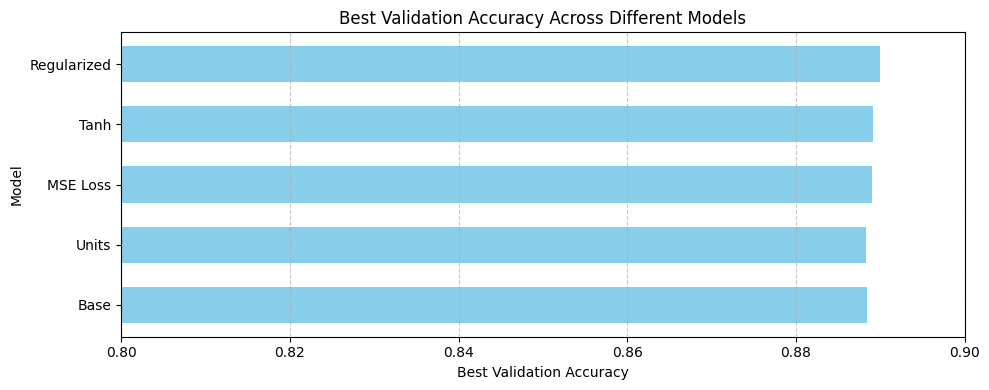

In [55]:

plt.figure(figsize=(10, 4))
plt.barh(performance_summary_df_all['Model'], performance_summary_df_all['Best Validation Accuracy'], color='skyblue', height=0.6)
plt.xlabel('Best Validation Accuracy')
plt.ylabel('Model')
plt.title('Best Validation Accuracy Across Different Models')
plt.xlim(0.8, 0.9)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Conclusion

Overall, from all the questions the validation accuracy stayed consistent around 0.888 - 0.891, shoing that increasing hidden layers or units had little effect on the overall performance. The Tanh activation slightly improved validation accuracy to 0.8909. Using the MSE loss function performed similar to binary-crossentropy. Adding regularization with dropout slightly reduced overfitting in the model and improved test accurcy slightly.Careful tuning can help control overfitting and the model from memorizing the training data. Drastic changes to the model do not necessarily improve the validation accuracy.